# 2. k-means Clustering with Semidefinite Programming - 45 points

Clustering is and unsupervised machine learning problem in which we try to partition a given dataset into $k$ subsets based on distance between data points or similarity among them. The goal is to find $k$ centers and to assign each data point to one of the centers such that the sum of the square distances between them are minimal [1]. This problem is known to be NP-hard. 

## Clustering problem
Given a set of $n$ points in a $d-$dimensional Euclidean space, denoted by

\begin{equation*}
S = \{ \mathbf{s}_i = (s_{i1}, \cdots, s_{id})^\top~\in \mathbb{R}^d ~~ i = 1, \cdots, n\}
\end{equation*}
find an assignment of the $n$ points into $k$ disjoint clusters $\mathcal{S} = (S_1, \cdots, S_k)$ whose centers are $\mathbf{c}_j(j = 1, \cdots, k)$ based on the total sum of squared Euclidean distances from each point $\mathbf{s}_i$ to its assigned cluster centroid $\mathbf{c}_i$, i.e.,

\begin{equation}
f(S,\mathcal{S}) = \sum_{j=1}^k\sum_{i=1}^{|S_j|}\|\mathbf{s}_i^{j} - \mathbf{c}_j \|^2,
\tag{Clustering Problem}
\end{equation}

where $|S_j|$ is the number of points in $S_j$, and $\mathbf{s}_i^{j} $ is the $i^{th}$ point in $S_j$.

## Lloyd's algorithm for k-means



  **1.** Choose initial cluster centers $\mathbf{c}_1, \mathbf{c}_2, \cdots , \mathbf{c}_k$
  
  **2.** Repeat until convergence:
  $$\begin{cases}
  \text{Assignment step: }~~  \mathbf{s}_i ~~\text{belongs to cluster } j\text{, where} j := \text{argmin}_{j \in [1,k]} \|\mathbf{s}_i-\mathbf{c}_j\|   \\
  \text{Update each cluster center: }~~~~~~~~ \mathbf{c}_j = \frac 1{|S_j|} \sum_{i=1}^{|S_j|} \mathbf{s}_i^{j} \\
  \end{cases}$$


Note that the algorithm converges to local optimal points, so
\eqref{eq:cluster} can be arbitrarily bad depending on the
initialization of the cluster centers.


 **SDP relaxation of the problem:** The work (Peng & Wei, 2007)
proposes an SDP-relaxation to approximately solve the aforementioned
model-free $k-$means clustering problem. The resulting optimization
problem (See section (2) of (Peng & Wei, 2007) for details of this
    relaxation and Lecture 14 for a brief introduction.) takes the standard semidefinite programming form

$$
\mathbf{X}^\star \in \arg \min_{ \mathbf{X} } \bigg\{ \langle \boldsymbol{C}, \mathbf{X} \rangle : ~\underbrace{\mathbf{X} \mathbf{1} =  \mathbf{1}}_{A_1(\mathbf{X}) = b_1},\underbrace{~\mathbf{X}^{\top} \mathbf{1} = \mathbf{1}}_{A_2(\mathbf{X}) = b_2},~\underbrace{\mathbf{X} \geq 0}_{B(\mathbf{X}) \in \mathcal{K}},~\underbrace{\mathrm{Tr}(\mathbf{X}) \leq \kappa, ~\mathbf{X} \in \mathbb{R}^{p\times p} ,~\mathbf{X}\succeq 0 }_{\mathcal{X}} \bigg\},
\tag{Problem 1}
$$
 
where $C \in \mathbb{R}^{p \times p}$ is the
Euclidean distance matrix between the data points.
$\mathrm{Tr}(\mathbf{X}) \leq \kappa$ enforces approximately low-rank
solutions, the linear inclusion constraint $\mathbf{X} \geq 0$ is element-wise
nonnegativity of ${\mathbf{X}}$, the linear equality constraints
$\mathbf{X}\mathbf{1} = \mathbf{1}$ and $\mathbf{X}^{\top} \mathbf{1} = \mathbf{1}$
require row and column sums of $\mathbf{X}$ to be equal to 1's, and
$\mathbf{X} \succeq 0$ means that $\mathbf{X}$ is positive semi-definite. Recall that
$\mathrm{Tr}(\mathbf{X}) = \|\mathbf{X}\|_\ast$ for any positive semi-definite matrix
$\mathbf{X}$.

The SDP in Problem 1 can be reformulated as 
$$
\min_{\mathbf{X} \in \mathcal{X}}~~~ f(\mathbf{X}) + g_1(A_1(\mathbf{X})) + g_2(A_2(\mathbf{X})) \qquad\text{subject to}\qquad B(\mathbf{X}) \in \mathcal{K}, \tag{Equation 2}$$ 
where $f(\mathbf{X}) = \langle  \boldsymbol{C}, \mathbf{X} \rangle$ is a
smooth convex function, $g_1=\delta_{\{b_1\}}(\cdot)$ is the indicator
function of singleton $\{b_1\}$, $g_2=\delta_{\{b_2\}}(\cdot)$ is the
indicator function of singleton $\{b_2\}$ and ${\mathcal{K}}$ is the
positive orthant for which computing the projection is easy.

## 2.1 Theory - 25 points

#### Question 2.1.1 (2 pts) 
Would Frank-Wolfe be a valid approach to solve this problem? Elaborate on your answer. 

<font color=‘blue’>
    
The presence of strict equality constraints introduced by the indicator function $g_1$ and $g_2$ complicates its direct application. These constraints restrict the feasible region to a specific affine subspace, making the LMO step non-trivial and potentially inefficient.

In the sequel, we will attempt to solve this problem with the HomotopyCGM method (**Algorithm 1**) proposed in
(Yurtsever et al., 2018) to handle the non-smooth problems with a
conditional gradient based method.
Another option for solving this problem is PD3O
method (**Algorithm 2**).

#### Question 2.1.2 (3 pts) Characterizing the domain

Show that the domain $\mathcal{X} = \{\mathbf{X}: \mathrm{Tr}(\mathbf{X}) \leq \kappa,~\mathbf{X} \in \mathbb{R}^{p\times p} ,~\mathbf{X} \succeq 0\}$ is a convex set. For this purpose, apply the definition of set convexity.


<font color=‘blue’>
    
Let $ \theta \in [0, 1] $ and define:
$$
\mathbf{Z} = \theta \mathbf{X} + (1 - \theta) \mathbf{Y}.
$$
We need to show that $ \mathbf{Z} \in \mathcal{X} $ i.e.,
$$
\mathrm{Tr}(\mathbf{Z}) \leq \kappa, \quad \mathbf{Z} \succeq 0.
$$
First of all, as trace is a linear mapping,  we have
$$
\mathrm{Tr}(\mathbf{Z}) = \mathrm{Tr}(\theta \mathbf{X} + (1 - \theta) \mathbf{Y}) = \theta \mathrm{Tr}(\mathbf{X}) + (1 - \theta) \mathrm{Tr}(\mathbf{Y}).
$$
Since $ \mathrm{Tr}(\mathbf{X}) \leq \kappa $ and $ \mathrm{Tr}(\mathbf{Y}) \leq \kappa $ 
$$
\mathrm{Tr}(\mathbf{Z}) \leq \theta \kappa + (1 - \theta) \kappa = \kappa (\theta + 1 - \theta) = \kappa.
$$
Thus,
$
\mathrm{Tr}(\mathbf{Z}) \leq \kappa.
$
It is also obvious that the linear sum of positive semidefinite matrices is also positive semidefinite
$$
\mathbf{v}^\top \mathbf{Z} \mathbf{v} = \theta \mathbf{v}^\top \mathbf{X} \mathbf{v} + (1 - \theta) \mathbf{v}^\top \mathbf{Y} \mathbf{v} \geq 0,
$$
since $ \mathbf{X} \succeq 0 $ and $ \mathbf{Y} \succeq 0 $.

#### Question 2.1.3  (8 pts) Gradient of the penalized objective

Given a linear inclusion constraint $Tx \in \mathcal{Y}$,
the corresponding quadratic penalty function is given by
$$\text{QP}_\mathcal{Y}(x) = \text{dist}^2(Tx, \mathcal{Y}) = \min_{y \in \mathcal{Y}} \| y-Tx\|^2.$$
Write down the constraints in (Equation 2) in
the quadratic penalty form. 

Write down the penalized objective based on the formulation in Lecture 13 with penalty parameter $\beta$.



<font color=‘blue’>
    
1. Equality Constraint $ A_1(\mathbf{X}) = b_1 $ :
   $$
    \| A_1(\mathbf{X}) - b_1 \|^2
   $$
   This term penalizes the squared Euclidean distance between $ A_1(\mathbf{X}) $ and $ b_1 $ , enforcing the constraint $ A_1(\mathbf{X}) = b_1 $.

2. Equality Constraint $ A_2(\mathbf{X}) = b_2 $ :
   $$
    \| A_2(\mathbf{X}) - b_2 \|^2
   $$
   Similarly, this term penalizes deviations from $ A_2(\mathbf{X}) = b_2 $ .

3. Inequality Constraint $ B(\mathbf{X}) \in \mathcal{K} $ :
   $$
    \text{dist}^2(B(\mathbf{X}), \mathcal{K})
   $$
   This term penalizes the squared distance from $ B(\mathbf{X}) $ to the positive orthant $ \mathcal{K} $ .

In the end, the quadratic penalty form is
$$
\min_{\mathbf{X} \in \mathcal{X}} \quad \langle \boldsymbol{C}, \mathbf{X} \rangle +  \| A_1(\mathbf{X}) - b_1 \|^2 +  \| A_2(\mathbf{X}) - b_2 \|^2 +  \text{dist}^2(B(\mathbf{X}), \mathcal{K}),
$$
as $f(X)=\langle \boldsymbol{C}, \mathbf{X} \rangle$. 

Thus, the penalized objective with penalty parameter $\beta$ is 
$$
F(X) = f(x) + \beta\cdot
 \| A_1(\mathbf{X}) - b_1 \|^2 
+ \beta\cdot \| A_2(\mathbf{X}) - b_2 \|^2 
+ \beta \cdot \text{dist}^2(B(\mathbf{X}), \mathcal{K})
$$

#### Question 2.1.4 (7 pts) 

Derive the gradient of the penalized objective explicitly  by deriving the gradient and projection specific to (Equation 2) -->. 
(Hint: You can write
$\text{dist}^2(Tx, \mathcal{Y}) = \| y^\ast - Tx \|^2$, where
$y^\ast = \arg \min _{y\in \mathcal{Y}} \| y - Tx \|^2$. and take
the derivative with respect to $\mathbf{X}$ without worrying about
$y^\ast$ depending on $\mathbf{X}$, thanks to Danskin's theorem.

<font color=‘blue’>
    

Gradient of $ f(\mathbf{X}) $ :
    $$
    \nabla_{\mathbf{X}} f(\mathbf{X}) = \nabla_{\mathbf{X}} \langle \boldsymbol{C}, \mathbf{X} \rangle = \boldsymbol{C}.
    $$
Gradient of $  \| A_1(\mathbf{X}) - b_1 \|^2 $ :
    $$
    \nabla_{\mathbf{X}} \left(  \| A_1(\mathbf{X}) - b_1 \|^2 \right) = 2  A_1^\top \left( A_1(\mathbf{X}) - b_1 \right).
    $$
Gradient of $  \| A_2(\mathbf{X}) - b_2 \|^2 $ :
    $$
    \nabla_{\mathbf{X}} \left(  \| A_2(\mathbf{X}) - b_2 \|^2 \right) = 2  A_2^\top \left( A_2(\mathbf{X}) - b_2 \right).
    $$
Gradient of $  \text{dist}^2(B(\mathbf{X}), \mathcal{K}) $ :
    $$
    \nabla_{\mathbf{X}} \left(  \| y^\ast - B(\mathbf{X}) \|^2 \right) = 2  \mathbf{B}^\top \left( B(\mathbf{X}) - y^\ast \right).
    $$

Summing up all the individual gradients, the gradient of the penalized objective function $ \mathcal{L}(\mathbf{X}) $ is:

$$
\nabla_{\mathbf{X}} \mathcal{L}(\mathbf{X}) = \boldsymbol{C} + 2\beta  A_1^\top \left( A_1(\mathbf{X}) - b_1 \right) + 2\beta  A_2^\top \left( A_2(\mathbf{X}) - b_2 \right) + 2 \beta\cdot \mathbf{B}^\top \left( B(\mathbf{X}) - y^\ast \right).
$$

#### Question 2.1.5 (5 pts) 

The algorithm PD3O (Yan, Ming, 2018) can be used to solve the problem
$$
\begin{equation} \min_x f(x) + g(A(x)) + h(x) \end{equation}
$$

where,
$f(x) = \langle \boldsymbol{C}, x \rangle$ and
$h(x) = \delta_{\mathcal{X}}(x)$. Moreover,
$g(A(x)) = g_1(A_1 (x)) + g_2(A_2 (x)) + \delta_{\mathcal{K}}(Bx)$ for a
suitably defined $g$ and $A$.
#### PD3O splitting method
  ------------------------------------------------------------------------------------------------------------------------------
  **1.** Choose $x^0 \in\mathcal{X}, y^0\in\mathbb{R}^{2p+p^2}$ and $\tau, \sigma >  0$
  
  **2.** For $k=1, 2, \ldots$ perform:
  $$\begin{cases}
  x^{k+1} &= \mathrm{prox}_{\tau h}(x^k - \tau (\nabla f(x^k) + A^\top y^k)) \\
  \tilde x^{k+1} &= 2x^{k+1} - x^k +  \tau \nabla f(x^k)-  \tau \nabla f(x^{k+1})\\
  y^{k+1} &= \mathrm{prox}_{\sigma g^\ast}(y^k + \sigma A(\tilde x^{k+1}))
  \end{cases}$$ 
  
  **3.Output: $~x^k$**
  
  ---------------------------------------------------------------------------------------------------------------------------------


In particular, define
$$\begin{aligned} 
z  = \begin{bmatrix} z_1 \\ z_2 \\ z_3 \end{bmatrix} = \begin{bmatrix}A_1x \\ A_2 x \\ Bx \end{bmatrix},~~~~~A = \begin{bmatrix} A_1 \\ A_2 \\ B \end{bmatrix}~~~~\Rightarrow~~~~~z= A(x),
\end{aligned}\tag{Definition of A}$$
and
$$\tag{Definition of g}
g(z) = \delta_{\{b_1\}}(z_1) + \delta_{\{b_2\}}(z_2) + \delta_\mathcal{K}(z_3).$$

Using the definitions we used for $g$ and $A$
in (Definition of A)
and (Definition of g), show that the $y^{k+1}$ update step of
PD3O can be written in the form
$$y^{k+1} := \begin{bmatrix} y_1^{k+1} \\ y_2^{k+1} \\ y_3^{k+1} \end{bmatrix} = \begin{bmatrix} y_1^k \\ y_2^k \\ y_3^k \end{bmatrix} +\sigma \begin{bmatrix} A_1\tilde x^{k+1} - b_1 \\ A_2\tilde x^{k+1} - b_2 \\ B\tilde x^{k+1} - \mathrm{proj}_{\mathcal{K}}(\sigma^{-1}y_3^k + B\tilde x^{k+1}) \end{bmatrix},$$
and
$$A^\top y^{k+1} = A^\top y^k + \sigma (A_1^\top(A_1 (\tilde x^{k+1}) - b_1) + A_2^\top (A_2 (\tilde x^{k+1}) - b_2) +B^\top(B\tilde x^{k+1} - \mathrm{proj}_{\mathcal{K}}(\sigma^{-1}y^k_3 + B\tilde x^{k+1}))),$$
where the vector $y$ in the dual domain can be written in the form
$y = [y_1~,~y_2~,~y_3]^\top$ with $y_1, y_2\in\mathbb{R}^p$ and
$y_3 \in\mathbb{R}^{p^2}$ (see
also (Definition of A)).

**Hint**: Use Moreau's decomposition to write the update using
$\mathrm{prox}_{g}$ instead of $\mathrm{prox}_{g^\ast}$. In
particular
$$y^{k+1} = \mathrm{prox}_{\sigma g^\ast}(y^k + \sigma A(\tilde x^{k+1})) = y^k + \sigma A( \tilde x^{k+1}) - \sigma \mathrm{prox}_{\sigma^{-1} g}(\sigma^{-1}y^k + A(\tilde x^{k+1})) \\
%&= y^k + \sigma (A_1\tilde x^{k+1} + A_2\tilde x^{k+1} + \tilde x^{k+1}) - \sigma (b_1+b_2+\mathrm{proj}_\mathcal{K}(\sigma^{-1}y^k + \tilde x^{k+1}))$$
The remaining steps are to
use (Definition of A) and find how to compute
$\mathrm{prox}_{g}$ when $g$ is in the decomposed form given
in (Definition of g).

<font color=‘blue’>

    
By Moreau decomposition we have 
$$
y^{k+1} = y^k + \sigma A(\tilde{x}^{k+1}) - \sigma \mathrm{prox}_{g}\left(\frac{y^k}{\sigma} + A(\tilde{x}^{k+1})\right).
$$

Given the structure of $ g(z) $ , the proximal operator decomposes component-wise:

$$
\mathrm{prox}_{g}\left(\frac{y^k}{\sigma} + A(\tilde{x}^{k+1})\right) = \begin{bmatrix} \mathrm{prox}_{\delta_{\{b_1\}}}\left(\frac{y_1^k}{\sigma} + A_1\tilde{x}^{k+1}\right) \\ \mathrm{prox}_{\delta_{\{b_2\}}}\left(\frac{y_2^k}{\sigma} + A_2\tilde{x}^{k+1}\right) \\ \mathrm{prox}_{\delta_{\mathcal{K}}}\left(\frac{y_3^k}{\sigma} + B\tilde{x}^{k+1}\right) \end{bmatrix}.
$$

where obviously by def. of $\delta$:

$$
\mathrm{prox}_{\delta_{\{b_i\}}}(v_i) = b_i \quad \text{for } i = 1, 2,
$$
$$
\mathrm{prox}_{\delta_{\mathcal{K}}}(v_3) = \mathrm{proj}_{\mathcal{K}}(v_3).
$$

Thus,

$$
\mathrm{prox}_{g}\left(\frac{y^k}{\sigma} + A(\tilde{x}^{k+1})\right) = \begin{bmatrix} b_1 \\ b_2 \\ \mathrm{proj}_{\mathcal{K}}\left(\frac{y_3^k}{\sigma} + B\tilde{x}^{k+1}\right) \end{bmatrix}.
$$


In the end:

$$
y^{k+1} = y^k + \sigma A(\tilde{x}^{k+1}) - \sigma \begin{bmatrix} b_1 \\ b_2 \\ \mathrm{proj}_{\mathcal{K}}\left(\frac{y_3^k}{\sigma} + B\tilde{x}^{k+1}\right) \end{bmatrix}.
$$

Or in a component-wise manner, we get what was needed:

$$
\begin{aligned}
y_1^{k+1} &= y_1^k + \sigma A_1\tilde{x}^{k+1} - \sigma b_1 \\
y_2^{k+1} &= y_2^k + \sigma A_2\tilde{x}^{k+1} - \sigma b_2 \\
y_3^{k+1} &= y_3^k + \sigma B\tilde{x}^{k+1} - \sigma \mathrm{proj}_{\mathcal{K}}\left(\frac{y_3^k}{\sigma} + B\tilde{x}^{k+1}\right)
\end{aligned}.
$$

Now, given $ A = \begin{bmatrix} A_1 \\ A_2 \\ B \end{bmatrix} $ the $ A^\top $ is:

$$
A^\top y^{k+1} = A_1^\top y_1^{k+1} + A_2^\top y_2^{k+1} + B^\top y_3^{k+1}.
$$

Substituting the expressions for $ y_i^{k+1} $ :

$$
\begin{aligned}
A^\top y^{k+1} &= A_1^\top \left( y_1^k + \sigma A_1\tilde{x}^{k+1} - \sigma b_1 \right) + A_2^\top \left( y_2^k + \sigma A_2\tilde{x}^{k+1} - \sigma b_2 \right) \\
&\quad + B^\top \left( y_3^k + \sigma B\tilde{x}^{k+1} - \sigma \mathrm{proj}_{\mathcal{K}}\left(\frac{y_3^k}{\sigma} + B\tilde{x}^{k+1}\right) \right) \\
&= A^\top y^k + \sigma \left( A_1^\top A_1\tilde{x}^{k+1} - A_1^\top b_1 + A_2^\top A_2\tilde{x}^{k+1} - A_2^\top b_2 \right) \\
&\quad + \sigma \left( B^\top B\tilde{x}^{k+1} - B^\top \mathrm{proj}_{\mathcal{K}}\left(\frac{y_3^k}{\sigma} + B\tilde{x}^{k+1}\right) \right) \\
&= A^\top y^k + \sigma \left( A_1^\top (A_1\tilde{x}^{k+1} - b_1) + A_2^\top (A_2\tilde{x}^{k+1} - b_2) + B^\top (B\tilde{x}^{k+1} - \mathrm{proj}_{\mathcal{K}}\left(\frac{y_3^k}{\sigma} + B\tilde{x}^{k+1}\right)) \right)
\end{aligned}.
$$

## 2.2 Practice - 20 points

In [1]:
from lib.part2.helpers import *
from lib.part2.Llyod_kmeans import *

### Define operators
We provide 2 operators and their conjugates:
1. `A1`: Linear operator that takes the row sums
2. `At2`: Conjugate of operator A1
3. `A2`: Linear operator that takes the column sums 
4. `At2`: Conjugate of operator A2

### Algorithm 1. Homotopy CGM

You will first implement Homotopy CGM which is defined below for the problem specified in (Equation 2).

  #### Homotopy Conditional Gradient Method (HCGM)
  ---------------------------------------------------------------------------------------------------------------------------------
  **1.** Choose $x^0 \in\mathcal{X}$ and $\beta_0 >  0$
  
  **2.** For $k=1, 2, \ldots$ perform:
  $$
  \begin{cases}
  \gamma_k &= 2/(k+1), ~~\text{and}~~ \beta_k = \beta_0 \sqrt{k+1} \\
  v_k &=  \nabla f(x_k) + \beta_k [A_1^\top (A_1(x_k) - b_1) + A_2^\top (A_2(x_k) - b_2) + (x_k - \text{proj}_{\mathcal{K}}(x_k))]\\
  \hat{x}^k &:= \mathrm{argmin}_{x \in \mathcal{X}} \left \langle  v_k,  x \right \rangle \\
  x^{k+1} &:= (1-\gamma_k)x^k + \gamma_k\hat{x}^k
  \end{cases}
  $$
  
  **3.** Output:$~x^{k+1}$
  
  ---------------------------------------------------------------------------------------------------------------------------------

HCGM is designed for solving constrained minimization problems of the form in (Equation 2). We define such a constrained problem in the following cell, where we specify an objective $f$ and a set of penalities $\{g_i\}$.


In [2]:
f = Function(
    f = lambda X : np.sum(C.flatten()*X.flatten()),
    grad = lambda X: C
)

g1 = Function(
    f = lambda X : 0.5 * np.linalg.norm((A1(X) - b))**2,
    grad = lambda X: At1(A1(X) - b)
)

g2 = Function(
    f = lambda X : 0.5 * np.linalg.norm((A2(X) - b))**2,
    grad = lambda X: At2(A2(X) - b)
)

g3 = Function(
    f = lambda X : 0.5 * np.linalg.norm((X - np.maximum(X, 0)))**2,
    grad = lambda X: 1000 * (X - np.maximum(X, 0)) # <-- fill in (x_k - proj_K(x_k))
)

p = ConstrainedProblem(f = f, penalties = [g1, g2, g3])


**Remark**: The 1000 factor in the term for $(x_k - \text{proj}_{\mathcal{K}}(x_k))$ in Algorithm 1 is in order to obtain a better practical convergence. This basically corresponds to having different penalty parameters for different constraints.

#### Question 2.2.1 (5 pts)

Complete the missing lines in the function
definitions of `HCGM`, which implements Homotopy CGM.

In [3]:
@dataclass
class HCGM_state(OptState):
    x_k: Matrix
    k: int
    beta0: float

In [4]:
def HCGM_initialize(f, Xzero, beta0):
    k = 0
    return HCGM_state(x_k = Xzero, k = k, beta0 = beta0)

For the update recall that a `ConstrainedProblem` can be unpacked as follows:

- `f` which is a `Function` that has a `grad` method
- `penalties` which is a list of functions each having a `grad` method

In [5]:
def HCGM_update(p : ConstrainedProblem, state : HCGM_state):
    f, penalties = p
    x_k, k, beta0 = state
    
    gamma_k = 2 / (k + 1)
    beta_k = beta0 * (k + 1)**(1/2)
    
    v_k = f.grad(x_k) + beta_k * sum(g.grad(x_k) for g in penalties)

    X_bar = lmo(v_k, kappa)
    """
    argmin x in X < v, x > = 
        if lambda min >= 0: return 0
        else: return kappa v vT, where v is the eigenvector of v with the smallest eigenvalue
    (the provided implementation of lmo always projects onto the nuclear norm ball)
    """

    X_next = (1 - gamma_k) * x_k + gamma_k * X_bar

    return HCGM_state(x_k = X_next, k = k+1, beta0 = beta0)

In [6]:
HCGM = OptAlgorithm(name="HCGM", init_state = HCGM_initialize, state_update = HCGM_update)

#### Question 2.2.2 (2 pts) Run HCGM

Run `HCGM` for $5000$-iterations and plot the result.

In [7]:
X_HCGM, f1_HCGM, f2_HCGM, f3_HCGM, obj_HCGM, iter_HCGM, time_HCGM = run_HCGM(HCGM, p, maxit=500, beta0=1.0)

500 | 4.8315e-04| 1.0675e-03| 3.7760e+02|: 100%|██████████| 500/500 [02:19<00:00,  3.58it/s]


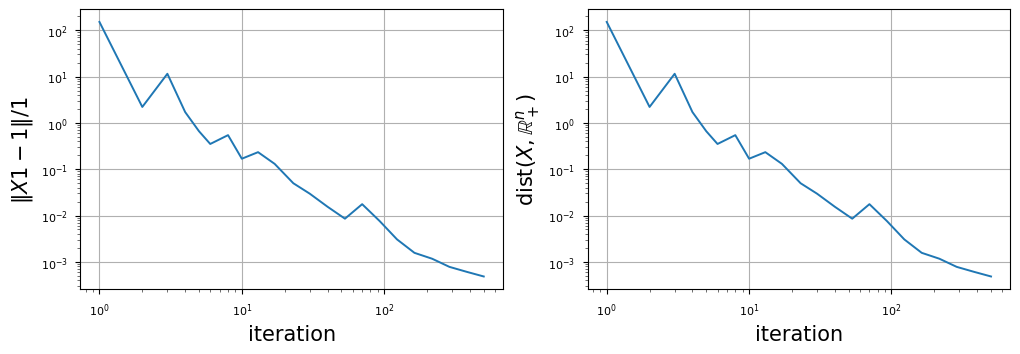

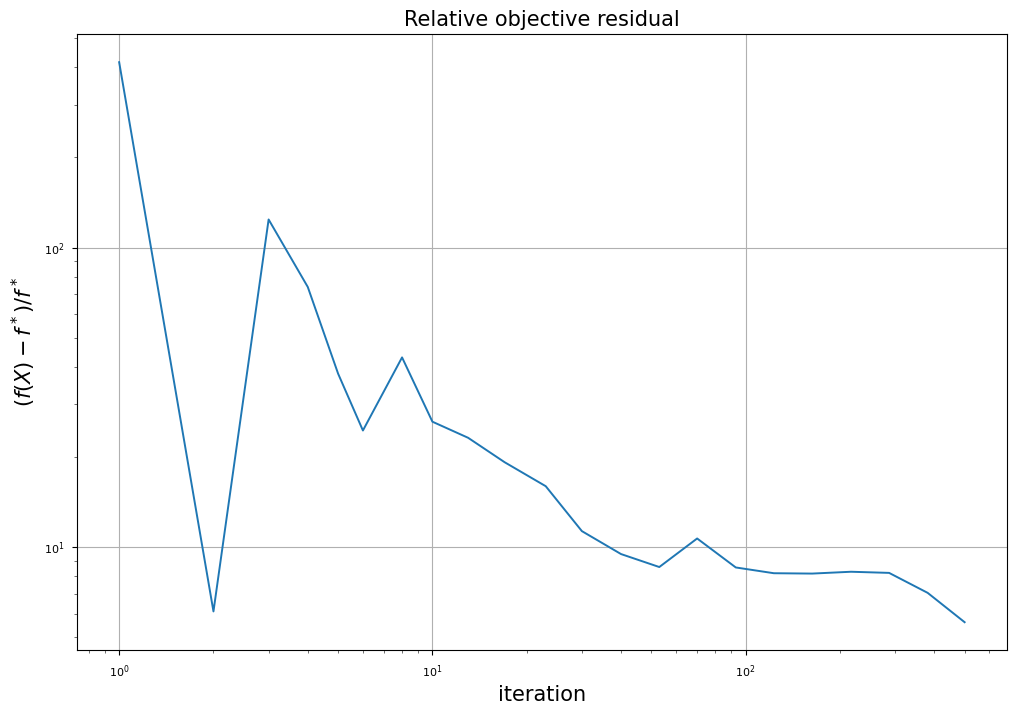

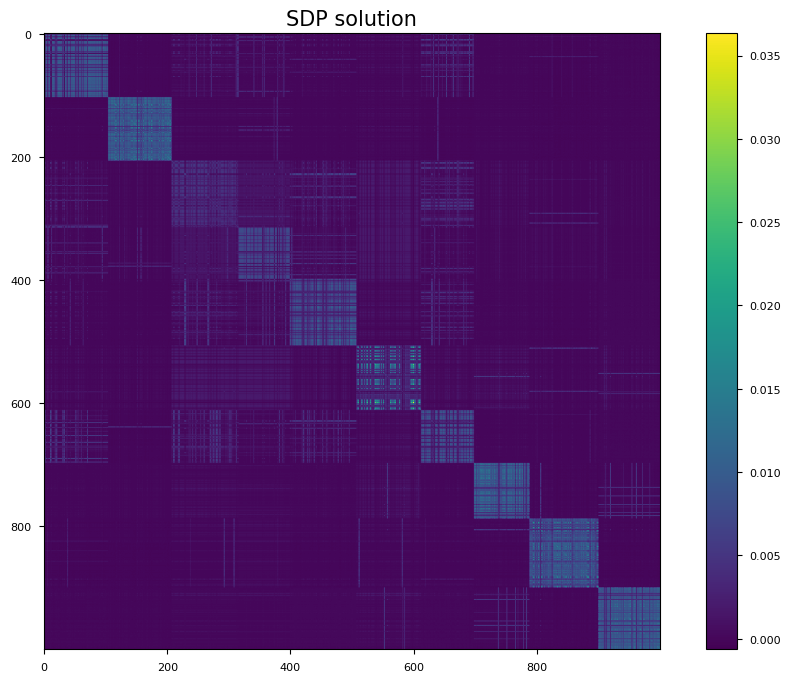

In [8]:
plot_func(iter_HCGM, f1_HCGM,f2_HCGM, obj_HCGM, X_HCGM, opt_val)

### Algorithm 2. PD3O splitting

To implement PD3O we need to specify the proximal operator of $h$ and $g^*$ as well as the linear operator $A$. We do so in the following cell. Note that the `DualVariable` class is created to keep track of all three dual variable $(y_1,y_2,y_3)$ in a concise way.
In the following cells fill in the proximal operators of $h$ and $g$.

**Hint**: Recall that the proximal operator of an indicator function is a projection. We give you the `projSDP`, which projects onto $\mathcal X$. Further, the proximal operator of a seperable sum is a concatenation of the proximal operators of each term (see the lecture on proximal methods).

In [9]:
f = Function(
    f = lambda X : np.sum(C.flatten()*X.flatten()),
    grad = lambda X : C
)

h = Function(
    f = lambda X : 0 if (ispsd(X) and np.trace(X) <= kappa) else float('inf') ,
    prox = lambda tau, X: projSDP(X, kappa)
)

g = Function(
    f = lambda y: 0 if (y.y_1==b) and (y.y_2==b) and (np.all(y.y_3 >=0)) else float('inf'),
    prox = lambda sigma, y: DualVariable(
        b, 
        b, 
        np.maximum(0, y.y_3)
    )
)

def A(x):
    return DualVariable(A1(x), A2(x), x)

def A_T(y):
    return At1(y.y_1)+ At2(y.y_2)+ y.y_3

composite = (f, g, h, A, A_T)

#### Question 2.2.3 (5 pts)

Complete the missing lines in the function
definitions of `PD3O` 

**Remarks:** 

- In our case, we advise you to **multiply the step-size for $y_3$ by $10^4$** to obtain a better practical convergence. It is possible to use different dual step sizes, $\{ \sigma_1 , \sigma_2, \sigma_3 \}$.  Such a diagonal variable stepsize is supported through `[sigma1, sigma2, sigma3]*dual_variable`.
- The algorithm needs the proximal operator of $g^*$, the Fenchel dual of $g$, using the Moreau identity express the prox of $g^*$ in terms of the prox of $g$. You will need to multiply by the stepsize `Sigma` and its inverse `Sigma_inv` which we provide in the code below.

In [10]:
@dataclass
class PD3O_state(OptState):
    x_k: Matrix
    y_k: DualVariable(Vector, Vector, Matrix)
    tau: float
    sigma: float

In [11]:
def PD3O_initialize(composite, x_zero):
    L = 1e2
    tau = 1/L
    return PD3O_state(x_k = x_zero, y_k = A(x_zero), tau=tau, sigma=1/(L**2*tau))

def PD3O_update(composite, state):
    f, g, h, A, A_T = composite
    y_k = state.y_k
    x_k, _, tau, sigma = state
    
    next_x_k = h.prox(tau, x_k - tau * (f.grad(x_k) + A_T(y_k)))

    x_bar = 2 * next_x_k - x_k + tau * f.grad(x_k) - tau * f.grad(next_x_k)
    
    Sigma = [sigma, sigma, sigma*1e4]
    Sigma_inv = [1/sigma, 1/sigma, 1/(sigma*1e4)]

    y_input = DualVariable(
        y_k.y_1 * Sigma_inv[0] + A(x_bar).y_1,
        y_k.y_2 * Sigma_inv[1] + A(x_bar).y_2,
        y_k.y_3 * Sigma_inv[2] + A(x_bar).y_3
    )
    prox_g_y = g.prox(Sigma_inv, y_input)
    next_y_k = DualVariable(
        y_k.y_1 + Sigma[0] * A(x_bar).y_1 - Sigma[0] * prox_g_y.y_1,
        y_k.y_2 + Sigma[1] * A(x_bar).y_2 - Sigma[1] * prox_g_y.y_2,
        y_k.y_3 + Sigma[2] * A(x_bar).y_3 - Sigma[2] * prox_g_y.y_3
    )

    
    return PD3O_state(next_x_k, next_y_k, tau, sigma)

In [12]:
PD3O = OptAlgorithm(name="PD3O", init_state = PD3O_initialize, state_update = PD3O_update)

#### Question 2.2.4 (2 pts) Run PD3O

Run `PD3O` for $1000$-iterations and plot the result.

In [13]:
X_PD3O, f1_PD3O, f2_PD3O, obj_PD3O, iter_PD3O, time_PD3O = run_PD3O(PD3O, composite, maxit=1000)

1000 | 3.2585e-07| 1.2735e-05| 5.7037e+01|: 100%|██████████| 1000/1000 [02:31<00:00,  6.62it/s]


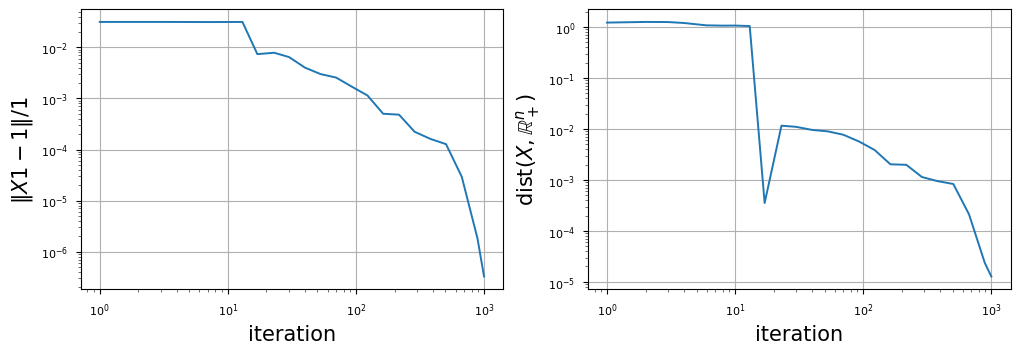

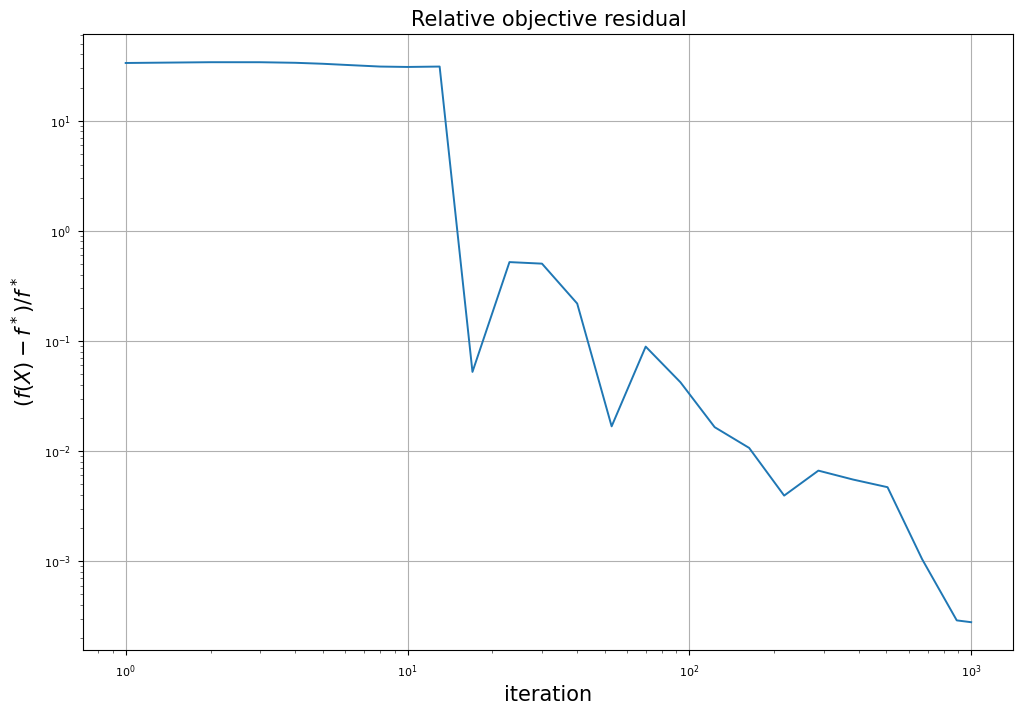

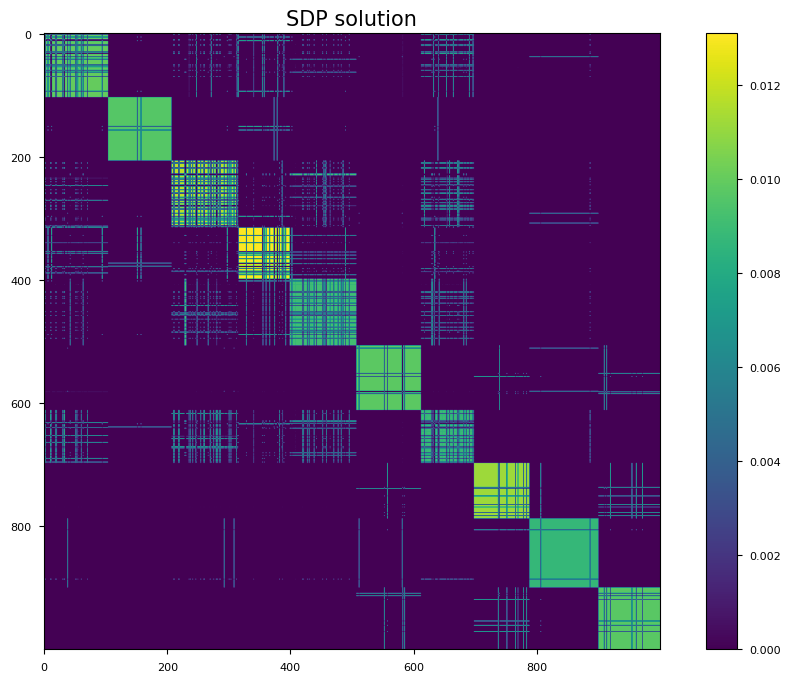

In [14]:
plot_func(iter_PD3O, f1_PD3O,f2_PD3O, obj_PD3O, X_PD3O, opt_val)

### Comparing HCGM and PD3O

#### Question 2.2.5 (3 pt)

Plot the results with the function `plot_comp`. What are the final objective values? Are they below the optimal value provided to you in `opt_val`? If yes, explain the reason. Answer in the box below.

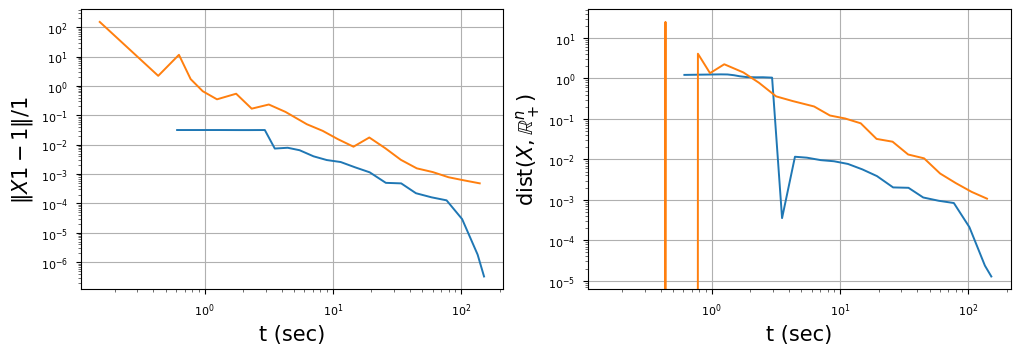

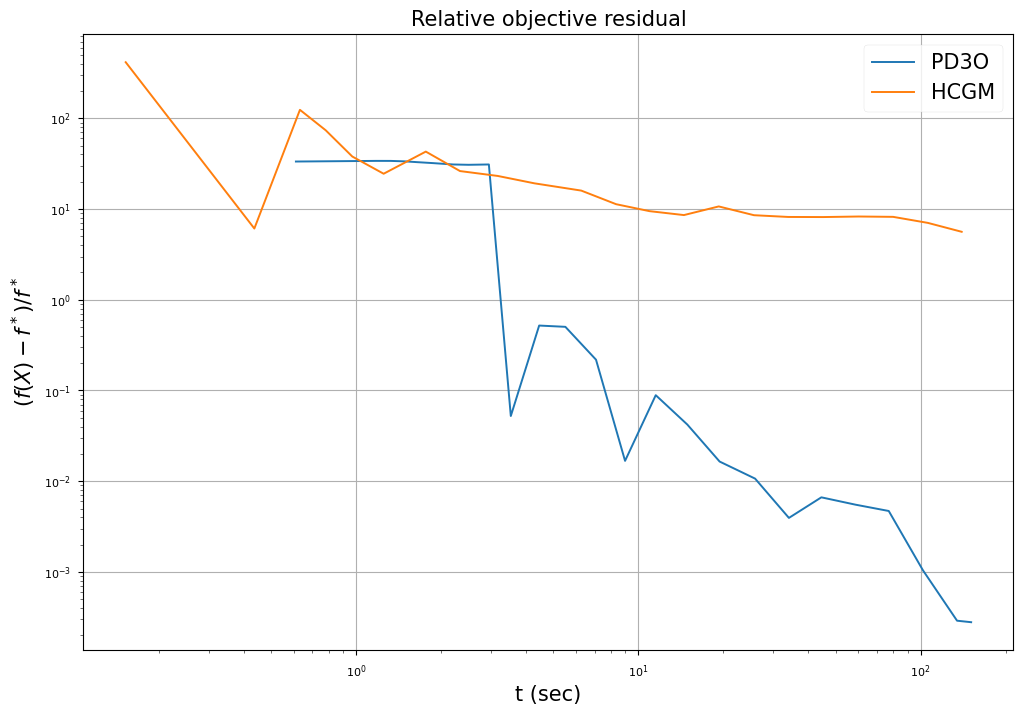

In [25]:
times = (time_PD3O, time_HCGM)
feas1 = (f1_PD3O, f1_HCGM)
feas2 = (f2_PD3O, f3_HCGM)
obj   = (obj_PD3O, obj_HCGM)
plot_comp(times, feas1,feas2, obj, opt_val)

In [40]:
print("Final objective values:")
print(f"PD3O: {obj_PD3O[-1]}, HCGM: {obj_HCGM[-1]}, Optimal: {opt_val[0][0]}")

Final objective values:
PD3O: 57.03747459321318, HCGM: 377.5971891650007, Optimal: 57.053391868140864


<font color=‘blue’>
    
The objective of PD30 is slightly below the optimal objective value. This may be because of a small constraint violation.

#### Rounding: Get the assignments from the result of the SDP
Getting the assignments requires going back to the $10$ dimensional space discussed before, and using the coordinates multiplied with the obtained matrix to construct a "denoised" version of the data points. This allows then to find the clusters from these $10$ dimensional data. Our implementation is the python reimplementation of their matlab code which can be found on [github](https://github.com/solevillar/kmeans_sdp).

In [31]:
center_HCGM, assign_HCGM = sdp_rounding(X_HCGM,10, digits)
center_PD3O, assign_PD3O = sdp_rounding(X_PD3O,10, digits)

#### k-means value: HCGM & PD3O

Using the function `value_kmeans`, run the cell below to obtain the $k$-means value before and after running both algorithms. 

    

In [33]:
k_means_before = value_kmeans(digits, labels-1) # k_means value with true labels
k_means_after_HCGM = value_kmeans(digits, assign_HCGM) # k_means value with assigned lables
k_means_after_PD3O = value_kmeans(digits, assign_PD3O) # k_means value with assigned lables

print('k-means value initial: {:.4f}'.format(k_means_before))
print('k-means value for HCGM: {:.4f}'.format(k_means_after_HCGM))
print('k-means value for PD3O: {:.4f}'.format(k_means_after_PD3O))

k-means value initial: 150.9680
k-means value for HCGM: 532.1088
k-means value for PD3O: 28.7269


#### Question 2.2.6 (3 pts) k-means value: Lloyd's algorithm

Run the function `kmeans` a few times and report the $k$-means value obtained by Llyod's algorithm. Compare it with the ones obtained by rounding the solution of convex methods `HCGM` and `PD3O`.  Comment on the result.

In [36]:
centers_Lloyd, classifications_Lloyd, k_means_Lloyd = kmeans(digits.T, 10)#k_means value with Lloyds k-means algorithm

print('k-means value for Lloyd''s algorithm: {:.4f}'.format(k_means_Lloyd))

k-means value for Lloyds algorithm: 127.5963


<font color=‘blue’>
    
Lloyd is the algorithm that returns a k-means value (sum of squared mean deviations) closest to the true label assignment. HCGM is the wors performing algorithm, and PD30 is the one with the lowest k-means value, even lower than with the true labels.

## OPTIONAL: Additional results for clustering fMNIST Data

### Misclassification rates: HCGM & PD3O


**Dataset:** We use the fashion-MNIST data in (Xiao et al. 2017) which is released as
a possible replacement for the MNIST handwritten digits . Each data
point is a 28x28 grayscale image, associated with a label from 10
classes. Classes
are labeled from 0 to 9. First, we extract the meaningful features from
this dataset using a simple 2 layers neural network with a sigmoid
activation. Then, we apply neural network to 1000 test samples from the
same dataset, which gives us a vector $\eta \in \mathbb{R}^{10}$ where
each entry represents the probability being in that class. Then, we form
the pairwise distance matrix $\boldsymbol{C}$ by using this probability
vectors (In the code, you do not need to worry about any of the processing
    details mentioned here. You are directly given the matrix
    $\mathbf{C}$.).

In [19]:
print('Misclassification rate for HCGM: {:.4f}'.format(misclassification_rate(assign_HCGM, labels)))
print('Misclassification rate for PD3O: {:.4f}'.format(misclassification_rate(assign_PD3O, labels)))

Misclassification rate for HCGM: 0.6050
Misclassification rate for PD3O: 0.1250


### Visualize samples and predicted labels

In [20]:
classes = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

In [21]:
def vis_samples(assignment, images, labels):
    assignment=assignment.astype(int)
    classes = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']
    labels = labels-1
    rand_samp = np.random.randint(0,1000,25)
    plt.figure(figsize=(7,7))
    for i,samp in enumerate(rand_samp):
        plt.subplot(5,5,i+1)
        plt.imshow(1-np.reshape(images[samp],[28,28]), cmap=plt.cm.gray)
        plt.title('Pred. {0}\n Orig. {1}'.format(classes[assignment[samp].item()],classes[labels[samp].item()]))
        plt.axis('off')
    plt.tight_layout()
    plt.show()

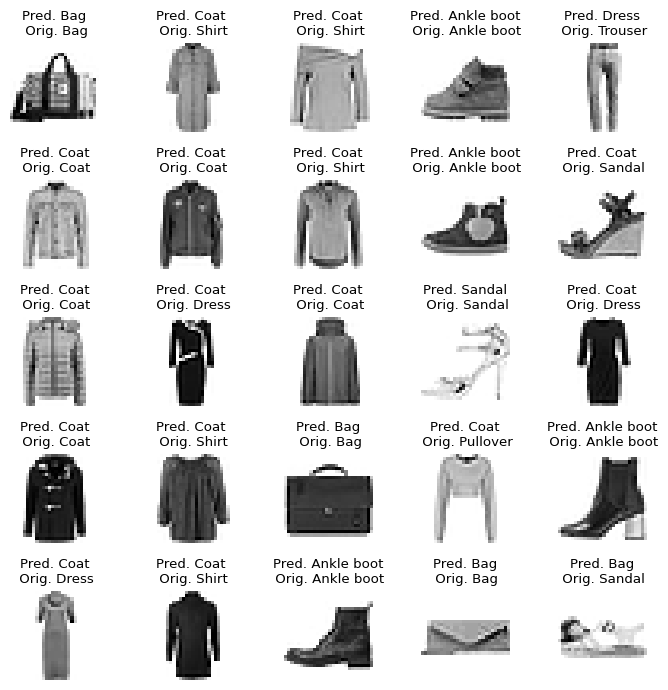

In [22]:
vis_samples(assign_HCGM, images,labels)

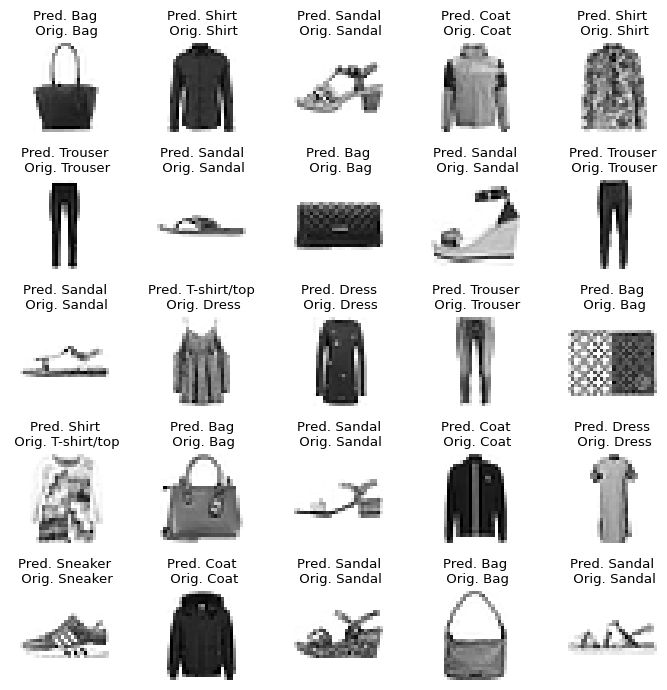

In [23]:
vis_samples(assign_PD3O, images,labels)

## References 

Xiao, Rasul & Vollgraf 2017,  Fashion-MNIST: a Novel Image Dataset for Benchmarking Machine Learning Algorithms

Peng & Wei 2007, Approximating K-means-type clustering via semidefinite programming

Yurtsever, Fercoq, Locatello & Cevher 2018, A Conditional Gradient Framework for Composite Convex Minimization with Applications to Semidefinite Programming